# Chapter 10 - Object Oriented Programming
Notebook by: Lindsey Sullivan

- [Introduction](#Introduction)
- [Custom Class Account](#Custom-Class-Account)
- [Controlling Access to Attributes](#Controlling-Access-to-Attributes) 
- [Properties for Data Access](#Properties-for-Data-Access)
- [Simulating "Private" Attributes](#Simulating-"Private"-Attributes)
- [Inheritance: Base Classes and Subclasses](#Inheritance:-Base-Classes-and-Subclasses)
- [Building an Inheritance Hierarchy: Introducing Polymorphism](#Building-an-Inheritance-Hierarchy:-Introducing-Polymorphism)
- [Duck Typing and Polymorphism](#duck-typing-and-polymorphism)
- [Operator Overloading](#Operator-Overloading)
- [Exception Class Hierarchy and Custom Exceptions](#Exception-Class-Hierarchy-and-Custom-Exceptions)
- [A Brief Intro to Python 3.7s New Data Classes](#a-brief-intro-to-python-37s-new-data-classes)
- [Unit Testing with Docstrings and doctest](#unit-testing-with-docstrings-and-doctest)
- [Namespaces and Scopes](#namespaces-and-scopes)




## Introduction

### Class Libraries and Object-Based Programming
- **Object-Based Programming** : primarily create and use objects of existing classes. For example: int, float, str, list, tuple

### Inheritance
- Concept that new classes can be formed through inheritance and composition from classes in abundant class libraries. Eventually, software will be constructed predominantly from **standardized, reusable components** just as hardware is constructed predominantly from interchangeable parts today. 
- When creatina  new class, instead of writing all new code, you can designate that the new class is to be formed initally by **inheriting** the attributes (variables) and methods (the class version of functions) of previously defined **base class** (also called a **superclass**).
- The new class is called a **derived class** (or **subclass**).

### Polymorphism
- **Polymorphism** which enables you to conveniently program "in the general" rather than "in the specific". Yous imply send the *same* method call to objects possibly of many *different* types. Each object responds by "doing the right thing." 

## Custom Class Account

- Each class you create becomes a new *data type* that can be used to create objects. This is one reason why Python is said to be an **extensible language**.
- To use the new Account class, launch your IPython session from the ch10 examples folder, then import class Account:

In [1]:
from account import Account

from decimal import Decimal #Class Account maintains and manipulates the account balance as a decimal, so we also import class Decimal

value = Decimal('12.34') #To create a Decimal object

#This is known as a constructor expression because it builds and initalizes an object of the class
# ------------

account1 = Account('John Green', Decimal('50.00')) 
#uses a constructor expression to create an Account object and initialize it with an account holder's name (a String) and balance (a Decimal)
# -------------
# Calling on the Account object's name and balance attributes
account1.name


ModuleNotFoundError: No module named 'account'

In [ ]:
account1.balance

Decimal('50.00')

In [ ]:
account1.deposit(Decimal('25.53'))
account1.balance

Decimal('75.53')

#### Self Check
1. Each new class you create becomes a new data type that can be used to create objects. This is one reason why Python is said to be a(n) _*extensible*_ language.
2. A _*constructor*_ expression creates and initalizes an object of a class. 

### Account Class Definition
- A class definition begins with the keyword **class** followed by the class's name and a colon(:). This line is called the **class header**. 

In [ ]:
# account.py
#"""Account class definition."""
#from decimal import Decimal

#class Account:

#def __init__(self, name, balance):
       # """Initialize an Account object."""

        # if balance is less than 0.00, raise an exception
        #if balance < Decimal('0.00'):
         #   raise ValueError('Initial balance must be >= to 0.00.')

        #self.name = name
        #self.balance = balance




- The constructor expression creates a new object, then initializes its data by calling the class's **_init_** method. 
- Python classes may define many **special methods**, like _init_ each identified by leading and trailing double-underscores in the method name. Python class **object**, which we'll discuss later in this chapter, defines the special methods that are avaialble for *all* Python objects.

### Composition: Object References as Members of Classes
- Embedding references to objects of other types is a form of software reusability known as **composition** and it is sometimes referred to as the **"has a" relationship**. 

#### Self Check
1. A class's _*_init_*_ method is called by a constructor expression to initalize a new object of the class. 
2. True/False - A class's _init_ method returns an object of the class.
    - **False**: A class's _init_ method initalizes an object of the class and implicity returns None.
3. Add a withdraw method to class Account. 

In [ ]:
def withdraw(self, amount):
    # if amount is great than balance, raise an exception
    if amount > self.balance:
        raise ValueError('amount must be <= to balance.')
    elif amount < Decimal('0.00'):
        raise ValueError('amount must be positive')
    
    self.balance -= amount

## Controlling Access to Attributes
- A class's **client code** is any code that uses objects of the class. Most object-oriented programming languages enable you to **encapsulate** (or *hide*) an object's data from the client code.

#### Self Check
1. True/False - Like most object-oriented programming languages, Python provides capabilities for encapsulating an object's data attributes so client code cannot access the data directly.
    - **False** In Python, all data attributes are accessible. you use attributes naming conventions to indicate that attributes shoudl not be accessed directly from client code. 

## Properties for Data Access

Creating a Time class that stores the time in 24-hour clock format with hours in the range 0-23, and minutes and seconds each in the range 0-59.

In [ ]:
#Create a Time Object
from timewithproperties import Time
wake_up = Time(hour=6,minute=30)

wake_up

Time(hour=6, minute=30, second=0)

In [ ]:
wake_up.hour #retreives an attribute via a property

#class time provides hour,minute and second properties, which provide the convience of data attributes for getting and modifying an object's data.

#Setting the time, you can set up a new time with the object's set_time method.
wake_up.set_time(hour=7, minute=45)
wake_up

Time(hour=7, minute=45, second=0)

#### Self Checks
1. The print function implicitly involves special method _str_.
2. IPython calls an object's special method _repr_ to produce a string representation of the object. 
3. True/False - Properties are used like methods.
    - **False** Properties are used like data attributes, but are implemented as methods. 

### Class Time Definition
- Class Time's _init_ method specifies hour,minute, and second parameters, each with a default argument of 0. 

In [ ]:
@property
def hour(self):
    """Returns the hour."""
    return self._hour
# Above defines a publicly accessible read-write property named hour that manipulates a data attribute named _hour.

- The **@property decorator** preceds the property's getter method, which receives only a self parameter. This *getter* method returns the _hour data attribute's value. The following client-code expression invokes the *getter* method:
    - wake_up.hour
- A decorator of the form **@property_name.setter** precedes the property's *setter* method. 
- A **read-write property** has both a *getter* and *setter*. 
- A **read-only property** has only a *getter* 

- Class Time: Special Method _repr_
    - When you pass an object to built-in function repr - which happens implicitly when you evaluate a variable in an IPython session - the corresponding class's _repr_ special method is called to get a string representation of the object:

In [ ]:
def __repr__ (self):
    """Return Time string for repr()."""
    return (f'Time(hour={self.hour}, minute={self.minute}, second={self.second})')

- Class time: Special Method _str_
    - For class Time we also define the _str_ special method. This method is called implicitly when you convert an object to a string with the built-in function str, such as wehn you pritn an object or call str explicitly. 

In [ ]:
def __str__ (self):
    """Print Time in 12-hour clock format."""
    return (('12' if self.hour in (0,12) else str(self.hour % 12)) + f' :{self.minute:0>2}:{self.second:0>2}' + ('AM' if self.hour < 12 else 'PM'))


#### Self Check
1. The print function implicitly invokes special method _str_.
2. A _*read-write*_ property has both a getter and setter. If only a getter is provided the property is a _*read-only*_ property, meaning that you only can get the property's value. 
3. Add to class Time with a read-write property time in which the getter returns a tuple containing the values of the hour, minute and second properties,  and the setter receives a tuple containing hour, minute and second values and uses them to set the time. 

In [ ]:
@property
def time(self):
    """Return hour, minute and second as a tuple"""
    return (self.hour, self.minute, self.second)
@time.setter
def time(self, time_tuple):
    """Set time from a tuple containing hour, minute and second"""
    self.set_time(time_tuple[0], time_tuple[1], time_tuple[2])

### Class Time Definition Design Notes
- Interface of a Class
    - Class Time's properties and methods define the class's **public interface** - that is, the set of properties and methods programmers should use to interact with objects of the class.
- Properties
    - Subtle properties with both *setters* and *getters* has no benefit over accessing the data attributes directkly, but there are subtle differences. A *getter* seems to allow clients to read the data at will, but the *getter* can control the formatting of the data.
- Utility Methods
    - Not all methods need ot serve as part of a class's interface. Some serve as **utility methods** used only inside the class and are not indendd to be part of the class's public interface used by client code.

#### Self Check
1. A class's _*interface*_ is the set of public properties and methods programmers shoudl use to interact with objects of the class.
2. A class's _*utility*_ methods are used only inside the class and are not intended to be used by client code. 

## Simulating "Private" Attributes
In programming languages such as C++, Java, and C#, classes state explicitly which class members are *publically accessible*. Class members amy not be accessed out a class definition are **private** and visable only within the class that defines them. Python programmers often use "private" attributes for data or utility methods that are essential to a class's inner workings but are not part of the class's public interface.

- To prevent access to class's clients, you can use 2 (_)'s which prevents client from accessing "private" attributes. Python *renames* them by preceding the attribute name with _ClassName. 
    - This is called **name mangling** - if you try to assign __hour then Python raises an AttributeError, indicating that the class does not have an __hour attribute.

In [ ]:
class PrivateClass:
    """Class with public and private attributes."""

    def __init__(self):
        """Initialize the public and private attributes"""
        self.public_data = "public" # public attribute
        self.__private_data = "private" #private attribute

#### Self Check
1. Python mangles attribute names that begin with _*two*_ underscore(s).
2. True/False - An attribute that begins with a single underscore is a private attribute.
    - **False** An attribute that begins with a single underscore simply conveys the convention that a client of the class should not access the attribute directly, but it *does* allow access. Nothing in Python makes it possible to enforce data hiding - it is all based upon convention.

## Inheritance: Base Classes and Subclasses

Often, an object of one class is an object of another class as well. Inheritance relationships form tree-like *herarchical* structures. A base class exists in a hierarchical relationship with its subclasses. 
**Inheritance hierarchy**
- Can contain many other classes - a **single inheritance** class is derived from *one* base class, with **multiple inheritance**, a subclass inherits from *two or more base classes*. 
- Inheritance produces a **"is-a" relationships** in which an object of a subclass type may also be treated as an object of the base-class type.

#### Self Check
1. A base class exists in a _*hierarchical*_ relationship with its subclasses.
2. In this section's shape class hierarchy, TwoDimensionalShape is a _*subclass*_ of Shape an a _*base class*_ of Circle, Square and Triangle.

## Building an Inheritance Hierarchy: Introducing Polymorphism

You use an inheritance to create new classes from existing ones. In fact, every Python class inherits from an existing class. When you do not explictly specify the base class for a new class. python assumes that the class inherits directly from class object.

#### Self Check
1. When a base-class method implementation is inappropriate for a derived class, that method can be _*overridden*_ (i.e.,redefined) in the derived class with an appropriate implementation. 
2. In this section's IPython session, explain in detail what:
    - c.gross_sales = Decimal('20000.00')
        - This statement creates a Decimal object and assigns it to a CommissionEmployee's gross_sales property, invoking the property's setter. The setter checks whether the new value is less than Decimal ('0.00'). If so the setter raises a ValueError, indicating that the value must be greater than or equal to 0; otherwise, the setter assigns the new value to the ComissionEmployee's _gross_sales attribute.

Python provides two built-in functions - **issubclass** and **isinstance** - for testing "is a" relationships. 

#### Self Check
1. Function _*isinstance*_ determines whether an object has an "is a" relationship with a specific type.
2. Function _*issubclass*_ determines whether one 
3. _*Polymorphism*_ enables us to take advantage of the "subclass-object-is-a-base-class-object" relationship to process objects in a general way.

## Duck Typing and Polymorphism

Most other object-oriented programming languages require inheritance-based "is-a" relationships to achieve polymorphic behavior. Python is more flexiable. it uses a concept called **duck typing**, which the Python documentation describes as:
    - A programming style which does not look at an object's type to determine if it has the right interface; instead, the method or attribute is simply called or used.

In [ ]:
for employee in employees:
    print(employee)
    print(f'{employee.earnings():,.2f}\n')

In Python, this loop works properly as long as employees contains only objects that:
- can be displayed with print
- have an earnings method which can be called with no arguments
All classes inherit from object directly or indirectly, so they all inherit the default methods for obtaining string representations that print can display. If a class has an earnings method that can be called with no arguments, we can include objects of that class in list employees, even if the object's class does not have an "is a" relationship with class ComissionEmployee. 

In [ ]:
class WellPaidDuck:
    def __repr__ (self):
        return 'I am a well-paid duck'
    def earnings(self):
        return Decimal('1_000_000.00')

WellPaidDuck objects, which clearly are not meant to be employees, will work with the preceding loop.

In [ ]:
from decimal import Decimal
from commissionemployee import CommissionEmployee
from salariedcommissionemployee import SalariedCommissionEmployee

c = CommissionEmployee('Sue','Jones','333-33-3333', Decimal('5000.00'), Decimal('0.04'), Decimal('300.00'))
d = WellPaidDuck()
employee = [c,s,d]

## Operator Overloading

Restrictions of Operator Overloading:
- The precedence of an operator cannot be changed by overloading. However, parentheses can be used to force evaluation order in an expression. 
- The left-to-right or right-to-left grouping of an operator cannot be changed by overloading. 
- The "arity" of an operator - that is, whether it's a unary or binary operator -- cannot be changed.
- You cannot create new operators -- only existing operators can be overlaoded.
- The meaning of how an operator works on objects of built-in types cannot be changed. you cannot, for example change + so that it subtracts two integers.
- Operator overloading works only with objects of custom classes or with a mixture of an object of a custom class and an object of a built-in type. 

In [ ]:
"""Complex class with overloaded operators."""
class Complex:
    """Complex class that represents a complex number with real and imaginary parts"""
    def __init__(self, real, imaginary):
        """Initalize Complex class's attributes."""
        self.real = real
        self.imaginary = imaginary
    def __add__(self,right):
        """Overrides the + operator"""
        return Complex(self.real + right.real, self.imaginary + right.imaginary)
    def __iadd__(self,right):
        """Overrides the += operator."""
        self.real += right.real
        self.imaginary += right.imaginary
        return self
    def __repr__(self)
        """Return string representation for repr()."""
        return (f'({self.real}' + ('+' if self.imaginary >= 0 else '-') + f'{abs(self.imaginary)}i)')    

x = Complex(real=2, imaginary=4)
y = Complex(real=5, imaginary=-1)

#using + we add the complext numbers

x + y # the + operator does not modify either of its operands

x += y #used to add y to x and store the result in x. The += operator modifies its left operand but not its right operand.

#### Self Check
1. Suppose a and b are integer variables and a program calculates a + b. Now supppose c and d are string variables and a program performs the concatentation c + d. The two + operators here are clearly being used for different purposes. This is an example of _*operator overloading*_. 
2. True/False - Python allows you to create new operators to overload and to change how existing operators work for built-in types. 
    - **False** Python prohibits you from creating new operators, and operator overloading cannot change how an operator works with built-in types. 
3. Modify class Complet to support operators - and -=.

In [ ]:
def __sub__ (self,right):
    return Complex(self.real - right.real, self.imaginary - right.imaginary)
def __isub__(self,right):
    self.real -= right.real
    self.imaginary -= right.imaginary
    return self

## Exception Class Hierarchy and Custom Exceptions

Exception classes inherit directly or indirectly from base class Base-Exception and are defined in module **exceptions**. Python defines four primary BaseException subclasses-- **SystemExit, KeyboardInterrupt, GeneratorExit, Exception**.
- SystemExit terminates program execution and when uncaught does not produce a traceback like other exception types.
- KeyboardInterrupt exceptions occur when the user types the interrupt command - Ctrl + C
- GeneratorExit exceptions occur when a generator closes - normally when a generator finishes producing values or when its close mehtod is called explicitly. 
- Exception is the base class for most common exceptions you'll encounter. 

#### Self Check
1. Most exceptions you'll encounter inherit from base class _*exception*_ and are defined in module _*exceptions*_.
2. True/False - When you raise an exception from your code, you should generally use a new exception class. 
    - **False** When you raise an exception from your code, you should generally use one of the existing exception classes from the Python Standard Libary. 

## Named Tuples

The Python Standard Libary's **collection module** also provides **named tuples** that enable you to reference a tuple's members by name rather than by index number. Function **namedtuple** creates a subclass of the built-in tuple type. The function's first argument is your new type's name and the second is a list of strings representing the identifiers you'll use to reference the new type's members. 

In [ ]:
from collections import namedtuple

Card = namedtuple('Card',['face','suit'])

card = Card(face='Ace', suit = 'Spades')

card

Card(face='Ace', suit='Spades')

Each named tuple type has addiitonal methods. The type's **_make class method** receives an iterable of values and returns an object of the named tuple type:

In [ ]:
values = ['Queen','Hearts']

card = Card._make(values)

card

Card(face='Queen', suit='Hearts')

For a given object of a named tuple type, you can get an **OrderedDict** dictionary representation of the object's member names and values. An OrderedDict remembers the order in which its key-value pairs were inserted in teh dicitonary.

In [ ]:
card._asdict()

{'face': 'Queen', 'suit': 'Hearts'}

#### Self Check
1. The Python Standard Libary's collections module's _*namedtuple*_ function creates a custom tuple type that enables you to reference the tuple's members by name rather than by index number.
2. Create a namedtuple called time with members naem hour,minute, and second. Then create a Time object, access its members and display its string representation.

In [ ]:
from collections import namedtuple

Time = namedtuple('Time', ['hour','minute','second'])

t = Time(13,30,45)

print(t.hour,t.minute,t.second)

13 30 45


## A Brief Intro to Python 3.7's New Data Classes
Data classes are among Python's 3.7 most important new feature. They help you build classes faster by using more concise notation and by autogenerating "boilderplate" code that's common in most classes. 

- Data classes autogenerate the data attributes and the __int_ and __repr_ methods for you. They also auto generate the __eq_, which overlaods the == operator. Any class that has an _eq_ method also implicitly supports !=. All classes inherit class object's default __ne_ (not equals) method implementation, which returns the opposite of __eq_.
- Data classes do not automatically generate methods for the <,<=, > and >= comparison operators, but they can. 

Using the **@dataclass decorator** will specify that a new class is a data class and causes various code to be written for you. 
- ClassVar[List[str]]
    - is a **variable annotation** sometimes called a *type hint* is a class attribute which refers to a list of strings. 

In [ ]:
from dataclasses import dataclass
from typing import ClassVar, List

@dataclass
class Card:

#### Self Check
1. Data classes require _*variable annotations*_ that specify each class attribute's or data attribute's data type.
2. The _*@dataclass*_ decorator specifies that a new class is a data class. 
3. True/False - The Python Standard Libary's annotations module defines the variable annotations that are required in data class definitions. 
    - **False** the typing module defines the variable annotations that are required in data-class definitions. 
4. True/False - Data classes have auto-generated <,<=, > and >= operators, by default. 
    - **False** The == and != operators are autogenerated by default. The other operators are autogenerated only if the dataclass decorator specifies the keyword argument order=True.    

## Unit Testing with Docstrings and doctest

The Python Standard Library provides the **docset module** to help you test your code and conveniently retest it after you make modifications. When you execute the doctest module **testmod function** it inspects your functions', methods', and classes' docstrings looking for sample Python statements preceded by >>>, each followed on the next line by the given statement's expected output. 

- The testmod reports errors indicating which tests failed so you can locate and fix the problems in your code. Each test you define in a docstring typically tests a specific *unit of code* such as a function, a method or a class. Such tests are called **unit tests**. 

- A conveient way to create doctests for existing code is to use an IPython interactive session to test your code, then copy and paste that session into a docstring. IPython's In[] and Out[] are not compatible with doctest, so Ipython provides the magic **%doctest_mode** to display prompts in teh correct doctest format. 

#### Self Check
1. When you execute a Python source file as a script. Python creates a global attribute [__name__] and assigns it the string _[__main__]_. 
2. True/False - When you execute the doctest module's testmod function, it inspects your code and automatically createstests for you. 
    - **False** - When you execute the doctest module's testmod function, it inspects your code's function, mehtod and class docstrings looking for sample Python statements your code's function method and class docstring looking for sample Python statements preceded by >>>, each followed on the next line by the given statement's expected output. 

## Namespaces and Scopes
Scopes are determined by **namespaces**, which associate identifiers with objects and are implemented "under the hood" as dictionaries. All namespaces are independent of one another. So the same identifier may appear in multiple namespaces. There are three primary namespaces - local,global, and built-in.

### Local Namespace
- Each function and method has a **local namespace** that associates local identiifers (such as parameters and local variables) with objects. The local namespace exists from the moment the function or method is called until it terminates and is accessible *only* to that function or method. 

### Global Namespace
- Each module has a **global anmespace** that associates a module's global identifiers (such as global variables, function names and class names) with objects. Python creates a module's global namespace when it loads the module. Each module's global namespace also has an identifier called *[_name_]* containing the module's name, such as 'math' for the math module or 'random' for the random module. 

### Built-In Namespace
- The **built-in namespace** associates identifiers for Python's built-in functions (such as input and range) and types (such as, int, float, and str) with objects that define those functions and types. Python creates the built-in namespace wehn the interpreter starts executing. 

### Nested Functions
- One namespace we did not cover in the preceding discussion is the **enclosing namespace**. Python allows you to define **nested functions** inside other functions or methods, for example, if a function or method performs the same task several times, you might define a nested function to avoid repeating code in the enclosing function. 
- Python searches the nested function's local namespace first, then the enclosing function's namespace, then the global namespace and finally the built-in namespace. 
    -**LEGB (Local, enclosing, global, built-in) rule**

#### Self Check
1. A function's _*local*_ namespace stores information about identiifers created in the function, such as its parameters and local variables. 
2. True/False - When a functionattempts to get an attribute's value, Python searches the local namespace,then the global namespace, then the built-in namespace until it finds the attribute; otherwise; a NameError occurs.
    - **True**

# Chapter 15 - Machine Learning: Classification, REgression and Clustering
- [Introduction to Machine Learning](#introduction-to-machine-learning)
- [Classification with k Nearest Neighbors](#classification-with-k-nearest-neighbors)
- [Classification with k Nearest Neighbors and the Digits Dataset Part 2](#classification-with-k-nearest-neighbors-and-the-digits-dataset-part-2)
- [Time Series and Simple Linear Regression](#time-series-and-simple-linear-regression)

## Introduction to Machine Learning

### Scikit-Learn
Scikit-Learn is the popular machine learning library, also called sklearn, conveniently packages the most effective machine-learning algorithms as estimators. 
-Scikit-learn has tools that automate training and testing your models. 
### Types of Machine Learning
Two types of machine learning - *supervised machine learning*, which works with *labeled data* and *unsupervised machine learning* which works with *unlabeled data*. 
- Supervised Machine Learning falls into two catagories *classification* and *regression*. You train machine-learning models on datasets that consist of rows and columns. Each row represents a *feature* of that sample. 
    - Classification algorithms predict the discrete classes to which samples belong.
    - Regression models predit a continuous output using SkitLearn's LinearRegression estimator. 
- Unsupervised Machine Learning is used with clustering algorithms. Using the dimensionality reduction with scikit-learn's TSNE estimator. 

### Steps in a Typical Data Science Study
1. Loading the dataset
2. Exploring the data with pandas and visualizations
3. Transforming your data - converting non-numeric data to numeric data because scikit-learn requires numeric data
4. Splitting the data for training and testing
5. Creating the model 
6. Training and testing the model
7. Runing the model and evaluting its accuracy
8. Making predictions on live data that the model hasn't seen before. 

#### Self Check
1. Machine learning falls into two main catagories _*supervised*_ machine learning, which works with labeled data and _*unsupervised*_ machine learning, which works with unlabeled data. 
2. True/False - With machine learning, rather than programming expertise into our applications, we program them to learn from data. 
    - **True**



## Classification with k-Nearest Neighbors

- **Binary** classification, divides samples into two distinct classes, and **multi** classification divides samples into many distinct classes. 
- **k-nearest neighbors (k-NN)** is the simplest classification algorithm from Scikit-learn. This algorithm attempts to predict a test sample's class by looking at the *k* training samples that are nearest (in distance) to the test sample. 

### Hyperparameters and Hyperparameter Tuning
- A **model** implements a machine-learning algorithm. In scikit-learn models are called **estimators**. There are two parameters types in machine learning:
    - those the estimator calculates as it learns form the data you provide 
    - those you specify in advance when you create the scikit-learn estimator object that represents the model. 
- The parameters specified in advance are called **hyperparameters**.
- The process of choosing the best value of *k* for the *k-nearest* neighbors algorithm is called **hyperparameter tuning**.

#### Self Checks
1. True/False - In machine learning a model implements a machine-learning algorithm. In scikit-learn, models are called estimators. 
    - **True**
2. The process of choosing the best value of *k* for the *k-nearest* neighbors algorithm is called **hyperparameter tuning**.

### Loading the Data Set
The **load_digits** function from the **sklearn.datasets module** returns a scikit-learn **Bunch** object containing the digits data and information *about* the Digits dataset (called **metadata**)

In [ ]:
from sclearn.datasets import load_digits

digits = load_digits()

- The Digits dataset bundled with scikit-learn is a subset of the **UCI ML hand-written digits dataset**. 
- A Bunch's **DESCR attribute** contains a description of the dataset. 
- The Bunch object's **data** and **target attributes** are NumPy arrays
- If you are working with a data containing **categorical features** represented as strings such as 'spam' or 'not-spam'. Scikit-learn's **sklearn.preprocessing** module provides capabilities for converting categorical data to numeric data. 

#### Self Check
1. A Bunch's object's _*data*_ and _*target*_ attributes are NumPy arrays containing the dataset's samples and labels, respectively. 
2. True/False - A scikit-learn Bunch object contains only a dataset's data. 
    - **False** A scikit-learn Bunch object contains a dataset's data and information about hte dataset (called metadata), available through the dESCR attribute. 
3. For sample number 22 in the Digits dataset, display the 8-by-8 image data and numeric value of the digit the image represents. 

In [ ]:
digits.images[22]
digits.target[22]

- The process of familiarizing yourself with your data is called _*data exploration*_. 
- Display the image for sample 22 of the Digits dataset.

In [ ]:
import matplotlib.pyplot as plt
axes = plt.subplot()
image = plt.imshow(digits.images[22], cmap=plt.cm.gray_r)
xticks = axes.set_xticks([])
yticks = axes.set_yticks([])

### Splitting the Data for Training and Testing
- First break the data into a **training set** and a **testing set** to prepare to train and test the model. 
- The function **train_test_split** fromt he **sklearn.model_select** module *shuffles* the data to randomize it, then splits the samples in the data array and the target values int hte target array into training and testing sets. 
- The shuffling and splitting is done for you by **ShuffleSplit** object from the sklearn.model_selection module. 

#### Self Check
- True/False - You should typically use all of a dataset's data to train a model. 
    - **False** It's important to set aside a portion of your data for testing, so you can evaluate a model's performance using data that the model has not yet seen. 

### Creating the Model
**KNeighborsClassifier** estimator (module **sklearn.neighbors**) implements the k-nearest neighbors algorithm. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

Next we invoke the KNeighborsClassifer object's **fit method** which loads the sample training set (x_train) and target training set (y_train) into the estimator

In [ ]:
knn.fit(x=x_train, y=y_train)

#### Self Check
1. The KNeighborsClassifier is said to be _*lazy*_ because its work is performed only when you use it to make predictions. 
2. True/False - Each scikit learn estimator's fit method simply loads a dataset.
    - **False** For most scikit-learn estimators, the fit method loads the data into the estimator that uses the data to perform complex calculations behind the scenes that learn from the data and train the model. 

### Predicting Digit Classes
- Calling the estimator's **predict method** as an argument returns an array containing the predicted class of each test image. 

## Classification with k-Nearest Neighbors and the Digits Dataset, Part 2

### Estimator Method Score
- Each estimator has a **score** method that returns an indiciation of how well the estimator performs for the test data you pass as arguments.
### Confusion Maxtrix
- Another way to check a classifications estimator accuracy is via a **confusion matrix** which shows the correct and incorrect predicted values for a given class. 
    - Simply call the function **confusion_matrix** from the **sklearn.metrics module**
    - [confusion = confusion_matrix(y_true= expected, y_pred=predicted)]
### Classification Report
- The sklearn.metrics module also provides function **classification_report**, which produces a table of **classification metrics** based on the expected and predicted values. 

- [from sklearn.metrics import classification_report]
- [names = [str(digit) for digit in digits.target_names]]
    - In the **precision** is the total number of correct predictions for given digit divided by the total number of predictions for that digit. 
    - **Recall** is the total number of correct predictions for a given digit divided by the total number of samples that should have been predicted as that digit. 
    - **f1-score** - This is the average of the precision and the recall
    - **support** - The number of samples with a given expected value. 

### Visualizing the Confusion Matrix
- A **heat map** displays values as colors, often with values of higher magnitude displayed as more intense colors. Seaborn's graphing functions work with two-dimensional data. 
- Seaborn's function **heatmap** creates a heat map form the specified DataFrame. 

#### Self Check
1. A Seaborn _*heat map*_ displays values as colors, often with values of higher magnitude displayed as more intense colors. 
2. True/False - In a classification report, the precision specifies the total number of correct predictions for a class divided by the total number of samples for that class. 
    - **True**
3. Explain row 3 of the confusion maxtrix presented:
    - [0,0,0,42,0,1,0,1,0,0]
    - The number 42 in column index 3 indicates that 42 3s were correctly predicted as 3s. The number 1 at column indices 5 and 7 indicates that one 3 was incorrectly classified as a 5 and one was incorrectly classified as a 7. 

### K-Fold Cross-Validation
**K-fold cross-validation** enables you to use all of your data for both training and testing, to get a better sense of how well your model will make predictions for new data by repeatedly training and testing the model with different portions of the dataset. 
- K-fold cross validation splits the dataset into k equal-size **folds**. 
- Scikit-learn provides the **KFold** class and the **cross_val_score function** to help you perform the training and testing cycles. 

#### Self Check
1. True/False - Randomizing the data by shuffling it before splitting it into folds is particularly important if the samples might be ordered or grouped. 
    - **True**
2. True/False - When you call cross_val_score to perform k-fold cross-validation, the function returns the best score produced while testing the model with each fold. 
    - **False** The function returns an array containing the scores for each fold. The mean of those scores is the estimator's overall score. 
3. True/False - You should choose the best estimator before performing your machine learning study. 
    - **False** It's difficult to know in advance which machine learning model(s) will perform best for a given dataset, especially when they hide the details of how they operate from their users. For this reason, you should run multiple models to determine which is the best for your study. 
4. True/False - When you create an estimator object, the default hyperparameter values that scikit-learn uses the generally the best ones for every machine learning study. 
    - **False** The default hyperparameter values make it easy for you to test estimators to choose hyperparameter values that produce the best possible predicitions. 

## Time Series and Simple Linear Regression

Using the **LinearRegression** estimator from **sklearn.linear_model**. By default, this estimator uses all the numeric features in a dataset, performing a **multiple linear regression**. 

In [54]:
import pandas as pd
import sklearn

nyc = pd.read_csv(r'/Users/lindseysullivan/Desktop/44-608/608-Mod7/Examples/ave_hi_nyc_jan_1895-2018.csv')

nyc.columns = ['Date', 'Temperature', 'Anomaly']

nyc.Date = nyc.Date.floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1), nyc.Temperature.values,random_state=11) 

#transforming the data from a one dimensional array to a two dimensional call the reshape method
X_train.shape

(93, 1)

In [56]:
X_test.shape

(31, 1)

In [57]:
#training the model since scikit-learn does not have a separate class for simple linear regression
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X=X_train,y=y_train)

LinearRegression()

In [58]:
#To find the best fitting regression line for the data, the LinearREgression estimator iteratively adjusts the slope and intercepts values to minimize the sum of the squares of the data points' distances.

linear_regression.coef_ #stores the slope

array([0.01939167])

In [59]:
linear_regression.intercept_ #stores the intercept

-0.30779820252658396

In [60]:
#testing the model

predicted = linear_regression.predict(X_test)
expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


To visualize the data - you can create a scatterplot of the dataset using Seaborn's scatterplot function and Matplotlib's plot function. 

In [61]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [62]:
import seaborn as sns

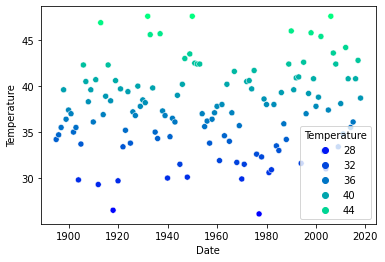

In [63]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue= 'Temperature', palette='winter')


- Data specifies the DataFrame
- x and y specify the names of nyc's columns that are the source of the data
- hue - specifies which column's data shoudl be used to determine the dot colors
- palette - specifies a Matplotlib color map
- legend=False - specifies that scatterplot should not show a ledgend for the graph

In [64]:
axes.set_ylim(10,70)

(10.0, 70.0)

In [65]:
import numpy as np
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

In [66]:
y = predict(x)

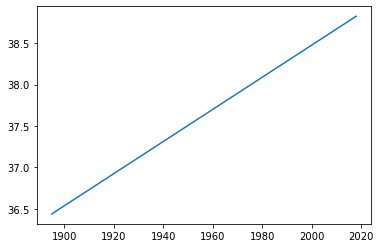

In [67]:
##use Matplotlib plot function to plot a line based on the x and y arrays

import matplotlib.pyplot as plt

line = plt.plot(x,y)

### Overfitting/Underfitting
- **Underfitting** occurs when a model is too simple to make predictions, based on its training data. 
- **Overfitting** occurs when your model is too complex. 

#### Self Check
1. A LinearRegression object's _*coeff_*_ and _*intercept_*_ attributes can be used as m and b, respectively, int he equation y = mx + b to make predictions. 
2. True/False - By default, the LinearRegression estimator performs simple linear regression. 
    - **False** By default the LinearRegression estimator uses all the numeric features in a dataset, performing a multiple linear regression. 
3. Use the predict lambda to estimate what the average January high tempeature was in 1889 and to predict what will be in 2020.

In [68]:
predict(1889)

array([36.32307265])

In [69]:
predict(2100)

array([40.41471572])